In [1]:
# rm(list=ls())
options(OutDec = ",") 
#===================================================================
# Análise de regressão.
#===================================================================
silence <- suppressPackageStartupMessages 
silence(library("aprean3")) # Biblioteca com a base de dados.
data(dsa01a)                # Lendo os dados.
y     <- dsa01a$x1
x     <- dsa01a$x8
n     <- length(y)

In [2]:
#===================================================================
# Algumas estatísticas descritivas de x e y:
# x: temperatura média em Fahrenheit;
# y: libras de vapor por mês.
#===================================================================
silence(library(psych))
options(digits=4)
x.describe    <- describe(x)
x.media       <- x.describe[,3]
x.desvpad     <- x.describe[,4]
x.mediana     <- x.describe[,5]
x.assimetria  <- x.describe[,11]
x.exc.curtose <- x.describe[,12]
STATSX        <- cbind(x.media,x.desvpad,x.mediana,x.assimetria,
                       x.exc.curtose)
rownames(STATSX) <- rownames(x.describe)

y.describe    <- describe(y)
y.media       <- y.describe[,3]
y.desvpad     <- y.describe[,4]
y.mediana     <- y.describe[,5]
y.assimetria  <- y.describe[,11]
y.exc.curtose <- y.describe[,12]
STATSY        <- cbind(y.media,y.desvpad,y.mediana,y.assimetria,
                       y.exc.curtose)
rownames(STATSY) <- rownames(y.describe)

STATS <- rbind(STATSX,STATSY)
rownames(STATS) <- c("x","y")
print(STATS)
print(cov(x,y))
print(cor(x,y))

  x.media x.desvpad x.mediana x.assimetria x.exc.curtose
x  52,600    17,266     57,50      -0,1022       -1,5885
y   9,424     1,631      9,14       0,1867       -0,9009
[1] -23,8
[1] -0,8452


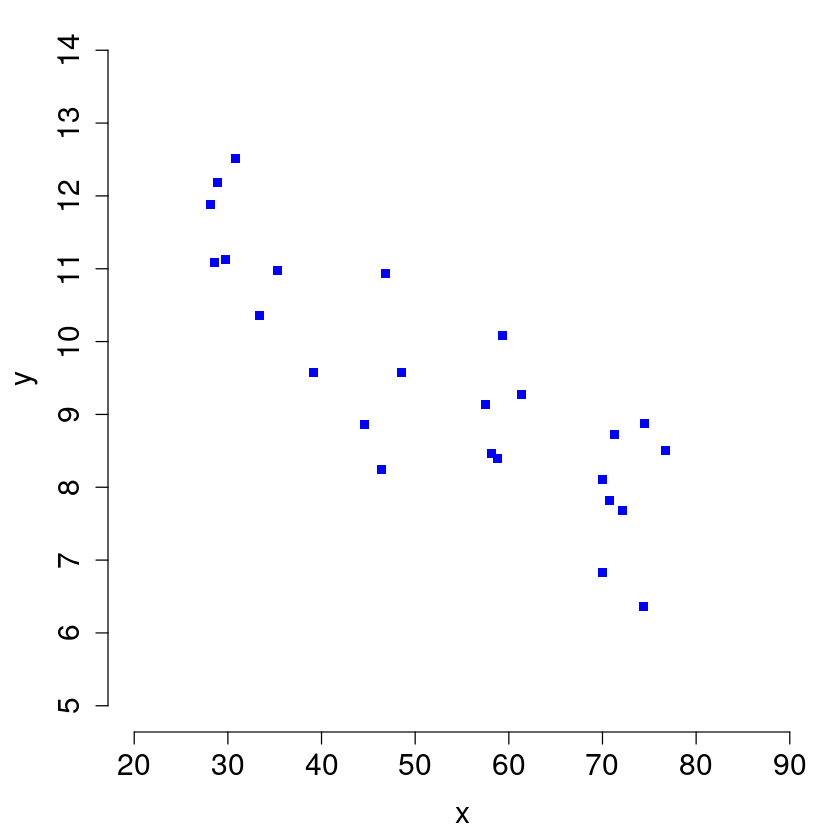

In [3]:
#===================================================================
# Gráfico de dispersão de x versus y.
# x: temperatura média em Fahrenheit;
# y: libras de vapor por mês.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,y,pch=15,lwd=3,col="blue",xlim=c(20,90),ylim=c(5,14))

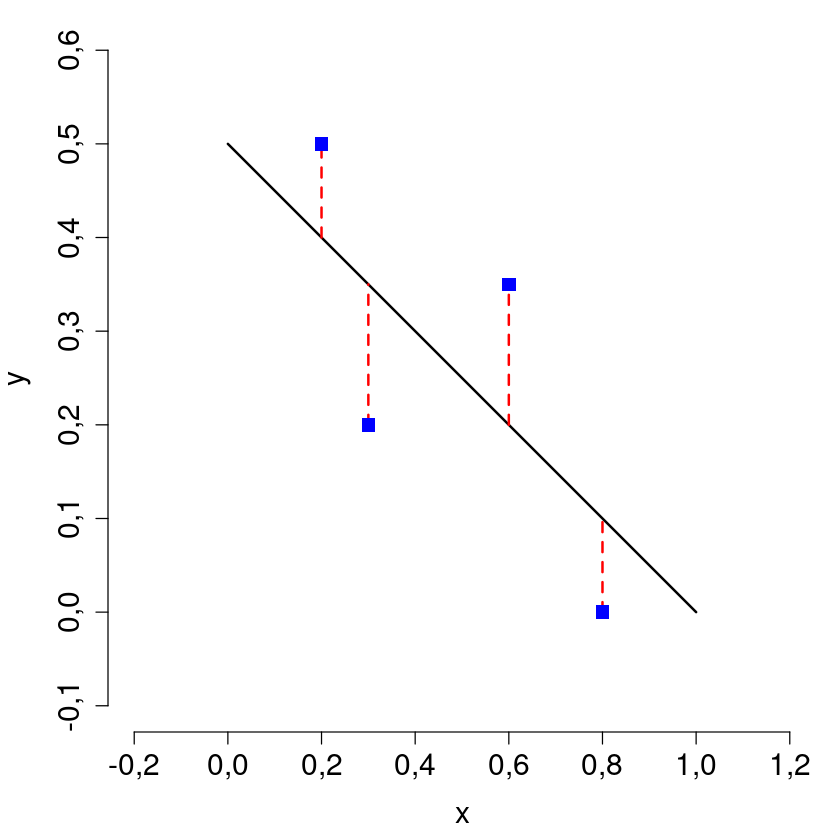

In [4]:
#===================================================================
# Gráfico ilustrativo da ideia de mínimos quadrados.
#===================================================================
xseq <- seq(0,1,length=11)
yseq <- 0.5-0.5*xseq
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(xseq,yseq,type="l",xlab=expression(x),ylab=expression(y),
    xlim=c(-0.2,1.2),ylim=c(-0.1,0.6),lwd=2,col="black")
xpoints <- c(0.2,0.3,0.6,0.8)
ypoints <- c(0.5,0.20,0.35,0) 
lines(c(0.2,0.2),c(0.4,0.5), col="red",lwd=2,lty=2)
lines(c(0.3,0.3),c(0.2,0.35),col="red",lwd=2,lty=2)
lines(c(0.6,0.6),c(0.2,0.35),col="red",lwd=2,lty=2)
lines(c(0.8,0.8),c(0,0.1),   col="red",lwd=2,lty=2)
points(xpoints,ypoints,pch=15,col="blue",cex=1.5)

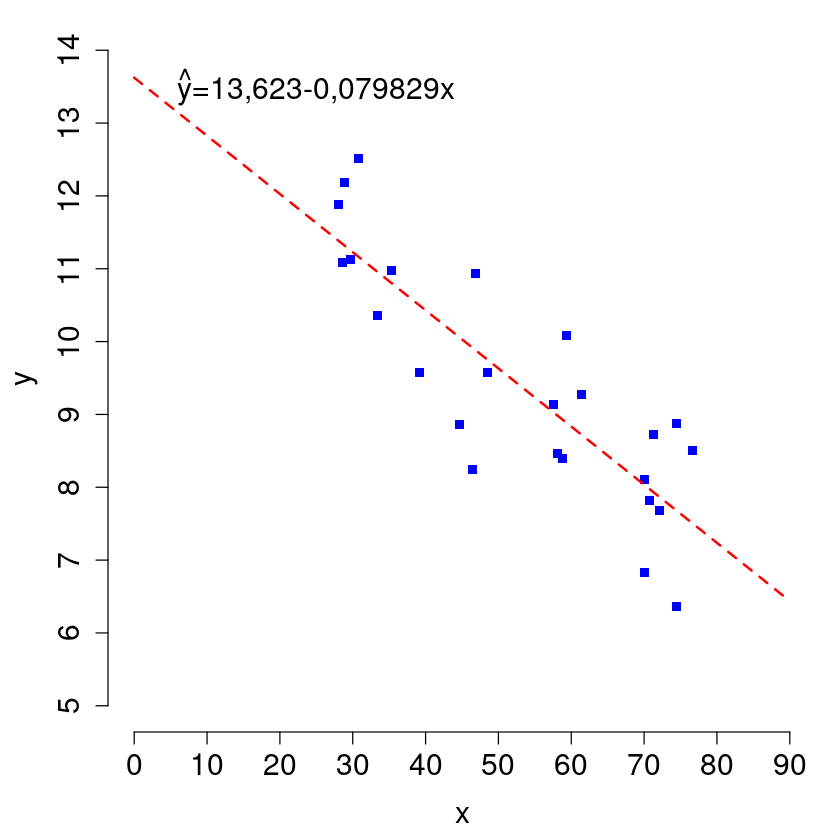

In [5]:
#===================================================================
# Ajuste da equação de regressão.
# Gráfico de dispersão de x versus y.
# x: temperatura média em Fahrenheit;
# y: libras de vapor por mês.
#===================================================================
b1   <- cov(x,y)/var(x)          # S_{xy} / S_{xx}
b0   <- mean(y) - b1*mean(x)     
xseq <- seq(0,90,length=1000)
yseq <- b0 + b1*xseq
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,y,pch=15,lwd=3,col="blue",xlim=c(0,90),ylim=c(5,14))
lines(xseq,yseq,col="red",lwd=2,lty=2)
text(x=25,y=13.5,cex=1.5,labels=expression(paste(hat(y),"=",
paste("13,623-0,079829",x))))

In [6]:
#===================================================================
# Cálculo dos valores ajustados e dos resíduos.
#===================================================================
yajustado <- b0 + b1*x
residuo   <- y - yajustado

In [7]:
#===================================================================
# Tabela.
#===================================================================
print(cbind(y,yajustado,residuo))

          y yajustado  residuo
 [1,] 10,98    10,805  0,17496
 [2,] 11,13    11,252 -0,12208
 [3,] 12,51    11,164  1,34573
 [4,]  8,40     8,929 -0,52906
 [5,]  9,27     8,722  0,54849
 [6,]  8,73     7,931  0,79880
 [7,]  6,36     7,684 -1,32373
 [8,]  8,50     7,500  0,99987
 [9,]  7,82     7,979 -0,15910
[10,]  9,14     9,033  0,10716
[11,]  8,24     9,919 -1,67894
[12,] 12,19    11,316  0,87406
[13,] 11,88    11,380  0,50020
[14,]  9,57    10,502 -0,93169
[15,] 10,94     9,887  1,05299
[16,]  9,58     9,751 -0,17130
[17,] 10,09     8,889  1,20085
[18,]  8,11     8,035  0,07502
[19,]  6,83     8,035 -1,20498
[20,]  8,88     7,676  1,20425
[21,]  7,68     7,867 -0,18734
[22,]  8,47     8,985 -0,51494
[23,]  8,86    10,063 -1,20263
[24,] 10,36    10,957 -0,59671
[25,] 11,08    11,340 -0,25989


In [8]:
#===================================================================
# Soma dos resíduos: verificando se realmente é zero.
#===================================================================
sum(residuo)

[1] 1,865e-14

In [9]:
#===================================================================
# Análise de variância.
#===================================================================
SQTot <- sum((y-mean(y))^2)
SQReg <- sum((yajustado-mean(y))^2)
SQRes <- sum(residuo^2)
print(rbind(SQTot,SQReg,SQRes))
print("===========================")
print(SQTot == (SQReg + SQRes))
print("===========================")
s2.y <- SQTot/(n-1)
s2   <- SQRes/(n-2)
R2   <- SQReg/SQTot
print(rbind(s2.y,s2,R2))

       [,1]
SQTot 63,82
SQReg 45,59
SQRes 18,22
[1] "==========================="
[1] TRUE
[1] "==========================="
       [,1]
s2.y 2,6590
s2   0,7923
R2   0,7144


In [10]:
#===================================================================
# Erro padrão de b_1.
#===================================================================
s     <- sqrt(s2)
Sxx   <- sum((x-mean(x))^2)
ep.b1 <- s/sqrt(Sxx)
print(c(sqrt(Sxx),ep.b1))

[1] 84,58380  0,01052


In [11]:
#===================================================================
# Intervalo de confiança para beta_1.
#===================================================================
tquantil <- qt(0.975,n-2)
print(c( b1 - tquantil*ep.b1, b1 + tquantil*ep.b1 ))

[1] -0,10160 -0,05806


In [12]:
#===================================================================
# Teste T de hipóteses H_0: beta_1=0 versus H_1: beta_1 != 0.
#===================================================================
t  <- (b1-0)/ep.b1
print(t)
print(abs(t) > tquantil)  # Se verdadeiro, rejeita-se H_0.

[1] -7,586
[1] TRUE


In [13]:
#===================================================================
# Teste F de hipóteses H_0: beta_1=0 versus H_1: beta_1 != 0.
#===================================================================
F  <- ( SQReg / 1 ) / s2 
print(F)
print(F > qf(0.95,1,n-2))

[1] 57,54
[1] TRUE


In [14]:
#===================================================================
# Correlação de Pearson, b_1 e R^2.
#===================================================================
print(cor(x,y))
print(b1)
print(R2)

# b1 = cor(x,y)*Syy/Sxx ?
print(round(b1,5) == round(cor(x,y)*sqrt(SQTot/Sxx),5))

# R2 = cor(x,y)^2  ?
print(round(R2,5) == round(cor(x,y)^2,5))

[1] -0,8452
[1] -0,07983
[1] 0,7144
[1] TRUE
[1] TRUE


In [15]:
#===================================================================
# Teste de Correlacao de Pearson
#===================================================================
print(cor.test(x,y)) #


	Pearson's product-moment correlation

data:  x and y
t = -7,6, df = 23, p-value = 1e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0,9298 -0,6758
sample estimates:
    cor 
-0,8452 



In [16]:
#===================================================================
# Análises das hipóteses do modelo (análise de resíduos).
#===================================================================
# Cuidado com as análises abaixo, pois há somente 25 observações!
#===================================================================

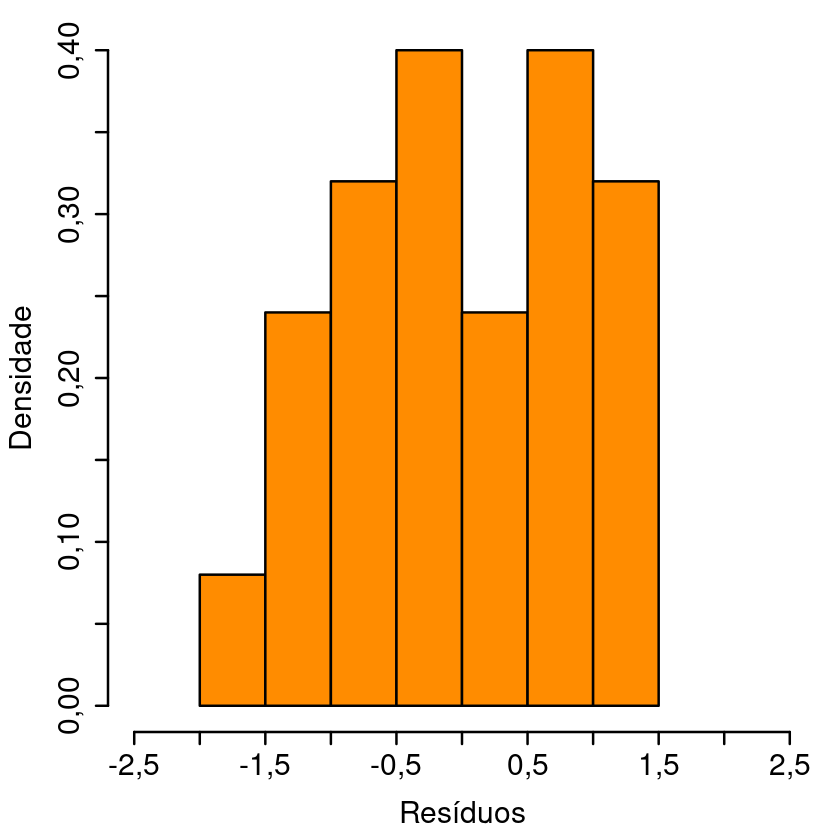

In [17]:
#===================================================================
# Histograma dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
hist(residuo,main="",prob=T,xlab="Resíduos",ylab="Densidade",lwd=2,
    col="darkorange",xlim=c(-2.5,2.5),ylim=c(0,0.40))

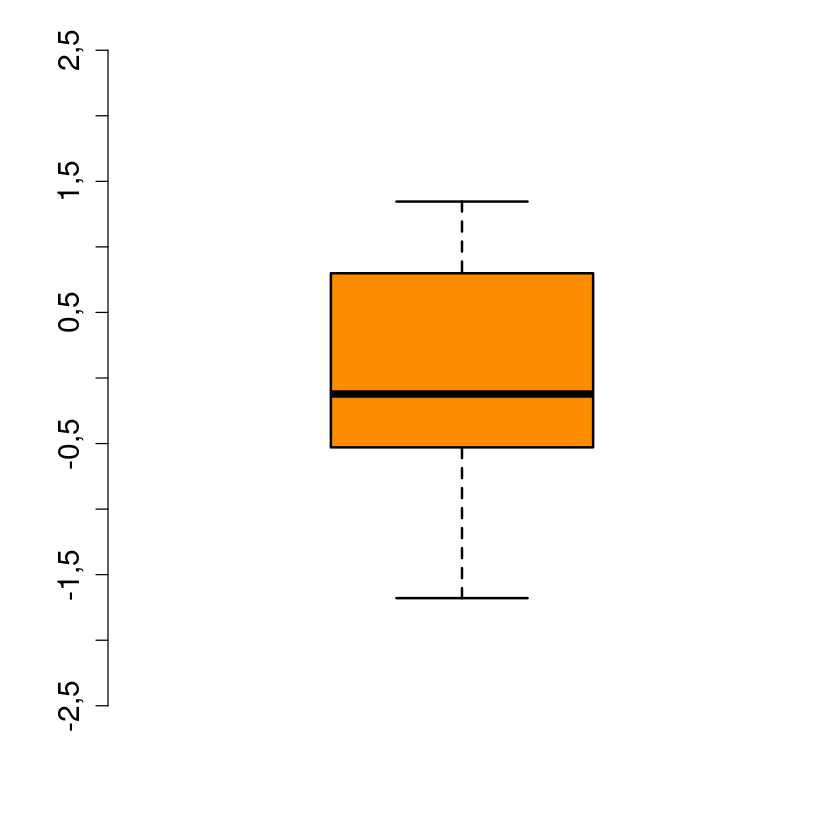

In [18]:
#===================================================================
# Boxplot dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
boxplot(residuo,ylim=c(-2.5,2.5),col="darkorange")

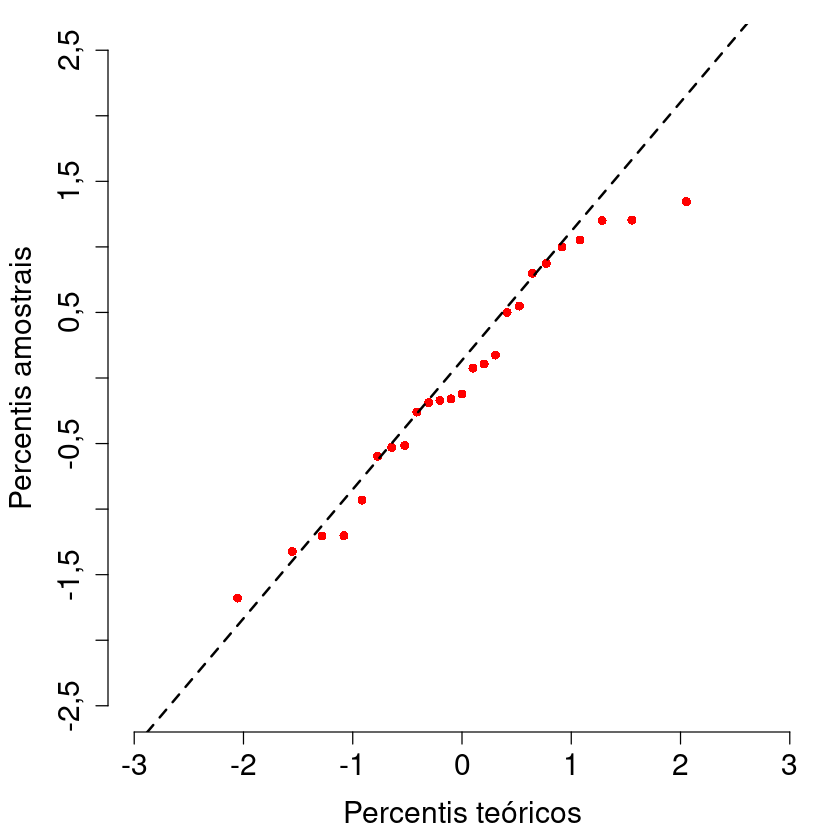

In [19]:
#===================================================================
# qq-norm dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
qqnorm(residuo,col="red",main="",xlab="Percentis teóricos",pch=16,
    xlim=c(-3,3),ylim=c(-2.5,2.5),ylab="Percentis amostrais",xpd=F)
qqline(residuo,lwd=2,bty="n",lty=2)

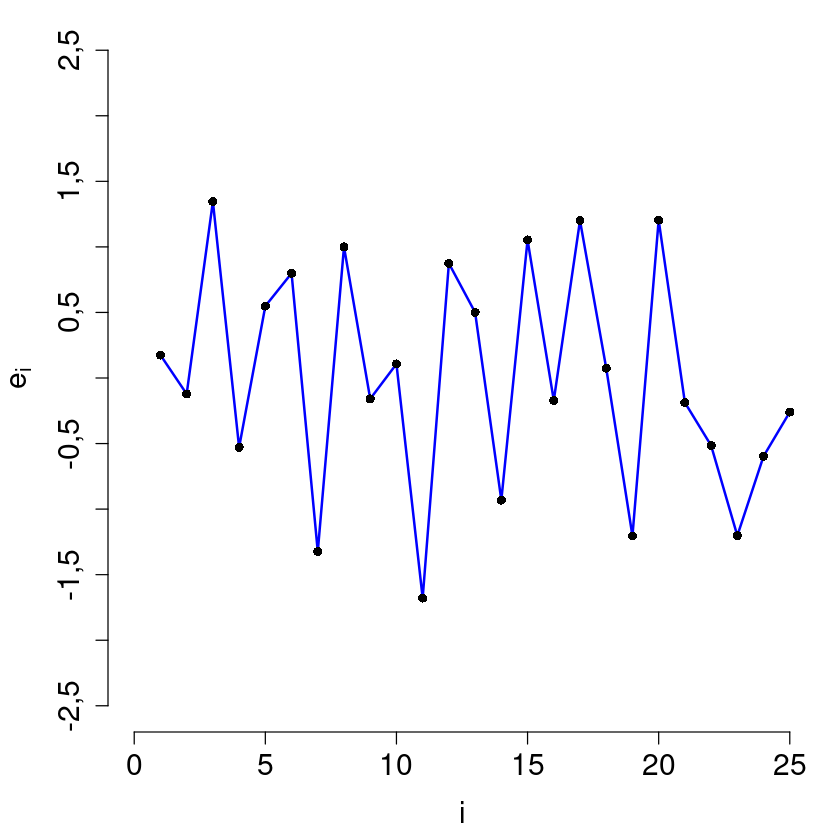

In [20]:
#===================================================================
# Resíduos ao longo dos índices (tempo).
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(6,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
ts.plot(residuo,lwd=2,col="blue",xlim=c(0,25),ylim=c(-2.5,2.5),
    xlab=expression(i),ylab=expression(e[i]))
points(residuo,pch=16,lwd=3,col=1)

[1] 1,242e-16


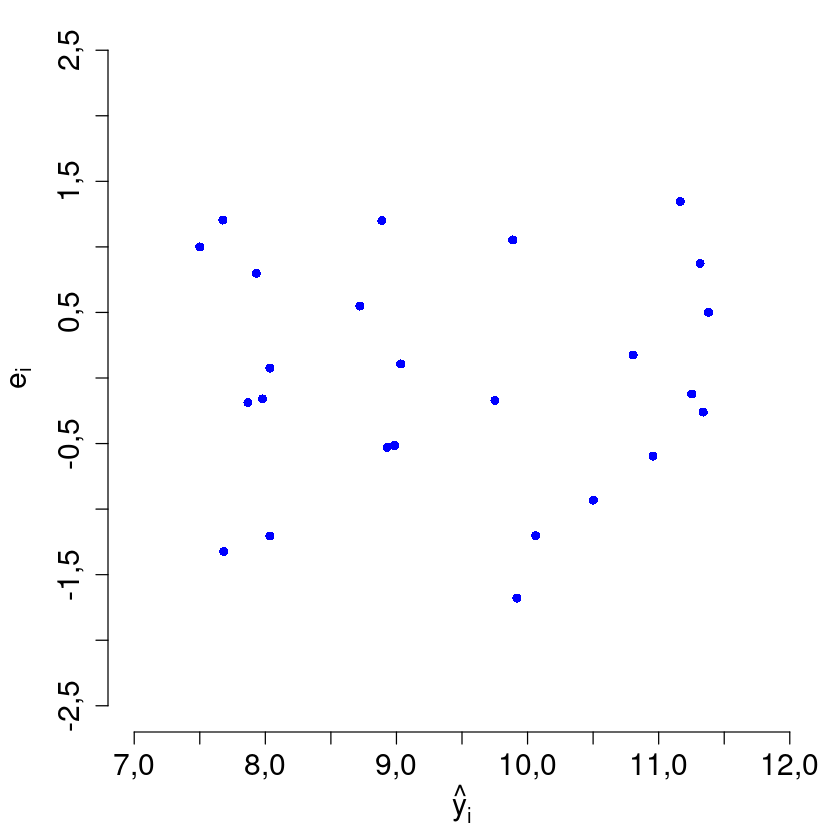

In [21]:
#===================================================================
# Dispersão entre valores ajustados e os resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(yajustado,residuo,lwd=2,col="blue",xlim=c(7,12),pch=16,
    ylim=c(-2.5,2.5),xlab=expression(hat(y)[i]),ylab=expression(e[i]))
print(cor(yajustado,residuo))

[1] -1,248e-16


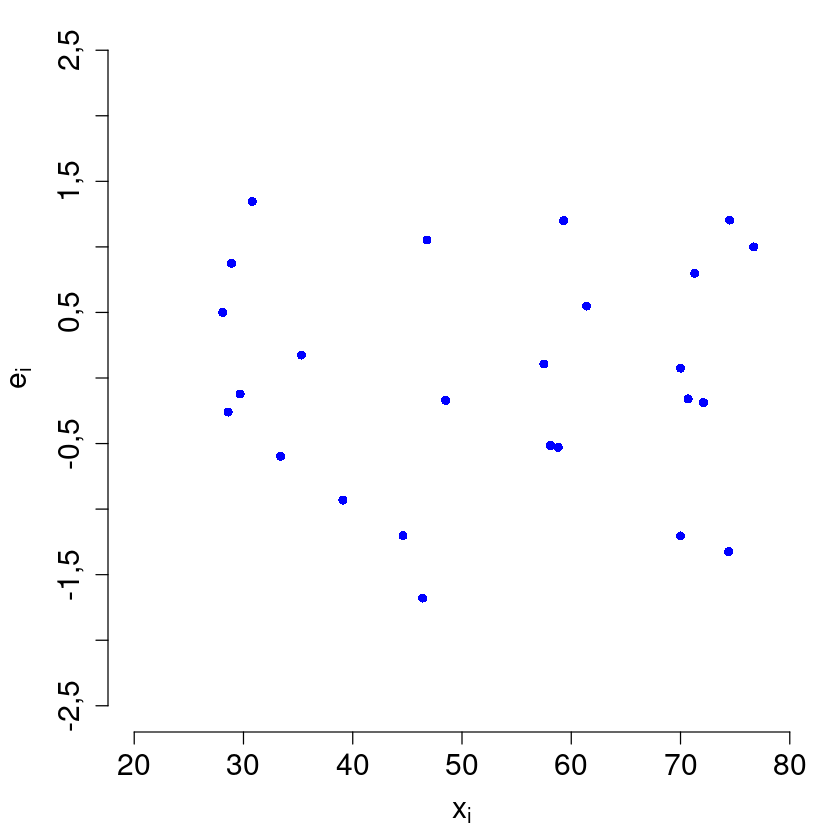

In [22]:
#===================================================================
# Dispersão entre valores da regressora e os resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,residuo,lwd=2,col="blue",ylim=c(-2.5,2.5),xlim=c(20,80),
    pch=16,xlab=expression(x[i]),ylab=expression(e[i]))
print(cor(x,residuo))

In [23]:
#===================================================================
# Algum problema encontrado nas analises graficas?
#===================================================================

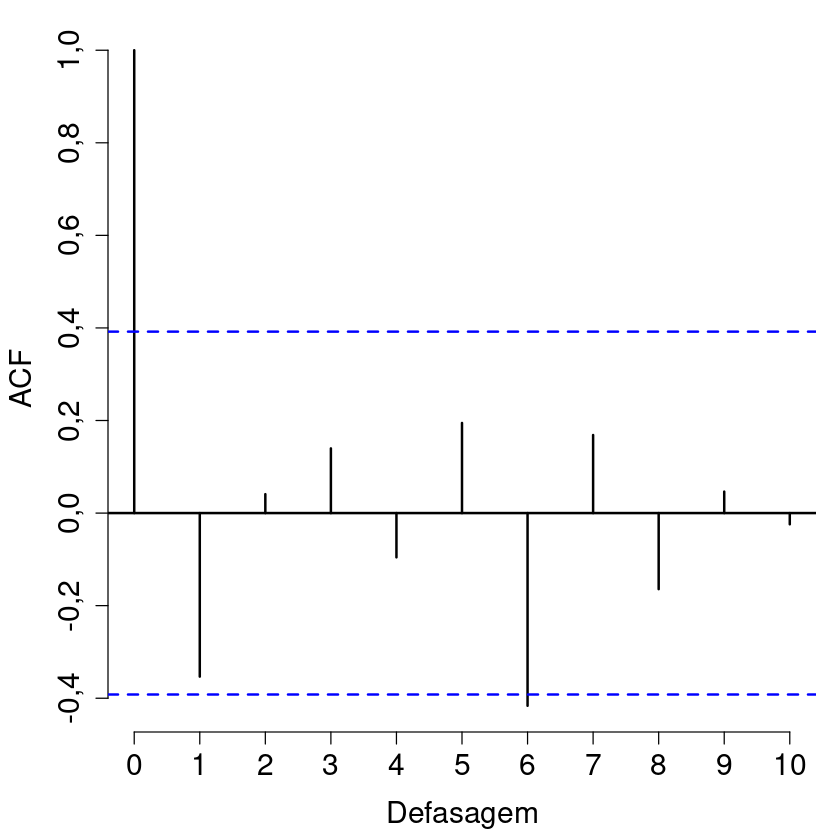

In [24]:
#===================================================================
# Verificando se os resíduos são correlacionados utilizando a função
# de autocorrelação amostral
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
acf(residuo,lwd=2,col="black",main="",xlab="Defasagem",ylab="ACF",
    xpd=F,lag.max=10)

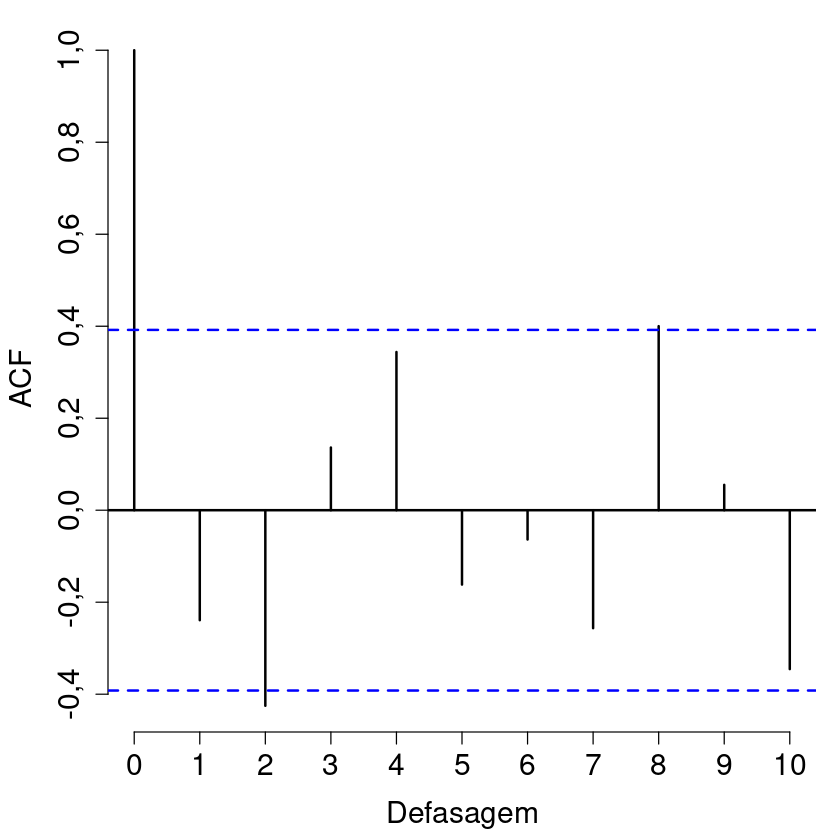

In [25]:
#===================================================================
# Verificando se os resíduos são correlacionados utilizando a função
# de autocorrelação amostral (quadrado dos resíduos).
# Homocedástico ou heterocedástico (ao longo das observações)?
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
acf(residuo^2,lwd=2,col="black",main="",xlab="Defasagem",ylab="ACF",
   xpd=T,lag.max=10)

In [26]:
#===================================================================
# Teste formal de normalidade
#===================================================================
# Teste parametrico
silence <- suppressPackageStartupMessages # Omitir mensagens de alertas
silence(library(tseries))   # Teste de Jarque-Bera: 'jarque.bera.test'
print(jarque.bera.test(residuo))


	Jarque Bera Test

data:  residuo
X-squared = 1,1, df = 2, p-value = 0,6



In [27]:
#===================================================================
# Predicao na media da regressao
#===================================================================
x0    <- 28.60             # Valor na qual se deseja prever
Ey0   <- b0+b1*x0     	   # Estimativa pontual da media da regressao
aux   <- s2*(1/n+(x0-mean(x))^2/Sxx) # Variancia estimada
epEy0 <- sqrt(aux)         # Erro padrao
# Intervalo de confianca
print(c(Ey0-tquantil*epEy0,Ey0+tquantil*epEy0)) 

[1] 10,70 11,98


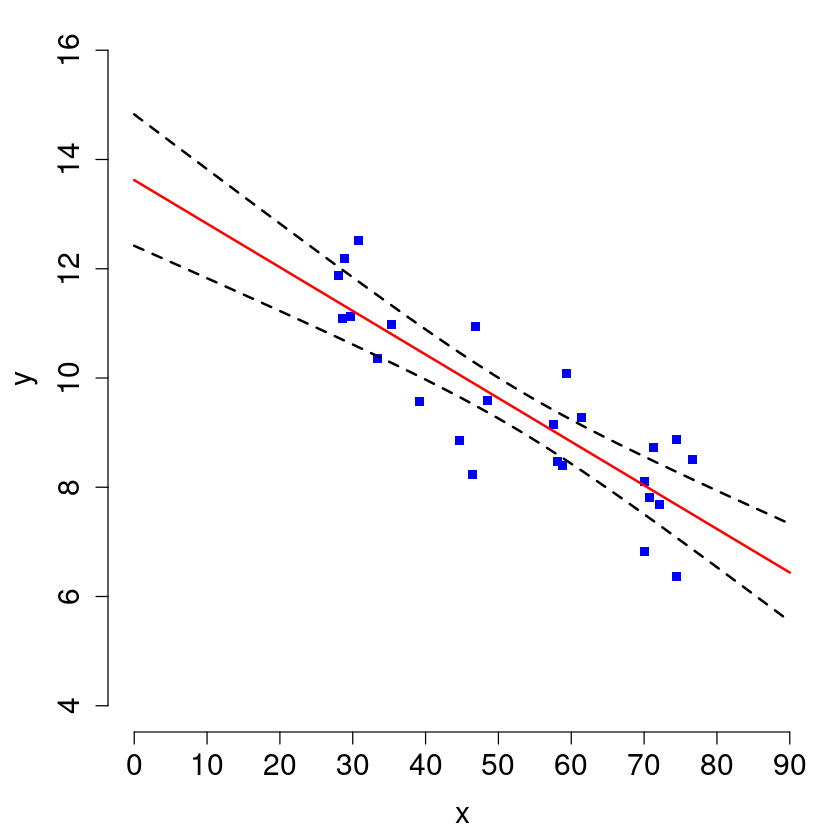

In [28]:
#===================================================================
# Construindo a visualizacao grafica
# Nota: o IC e' para a media da regressao
#===================================================================
sx0     <- seq(0,90,by=0.5)
sEy0    <- b0+b1*sx0     	   
saux    <- s2*(1/n+(sx0-mean(x))^2/Sxx) 
sepEy0  <- sqrt(saux)    
spredic <- cbind(sEy0-tquantil*sepEy0,sEy0+tquantil*sepEy0) 

par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,y,pch=15,lwd=3,col="blue",xlim=c(0,90),ylim=c(4,16))
lines(xseq,yseq,col="red",lwd=2)
lines(sx0,spredic[,1],col="black",lwd=2,lty=2)
lines(sx0,spredic[,2],col="black",lwd=2,lty=2)

In [29]:
#===================================================================
# Predicao nas observacoes
#===================================================================
y0    <- b0+b1*x0     	   # Estimativa pontual da observacao
aux   <- s2*(1+1/n+(x0-mean(x))^2/Sxx) # Variancia estimada
epy0  <- sqrt(aux)         # Erro padrao
# Intervalo de confianca
print(c(y0-tquantil*epy0,y0+tquantil*epy0)) 

[1]  9,391 13,289


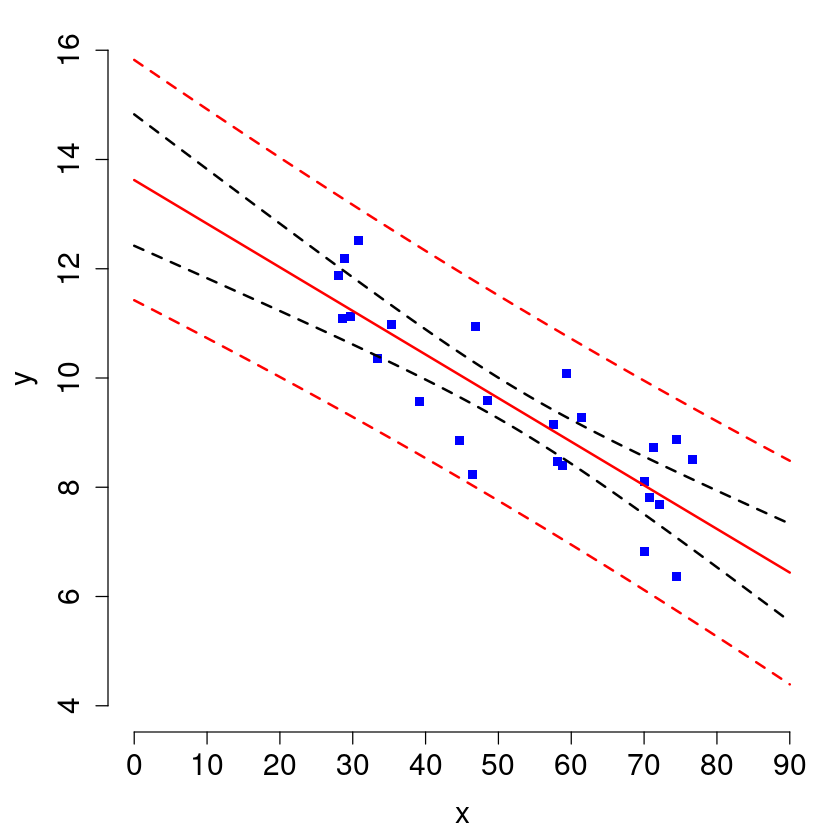

In [30]:
#===================================================================
# Construindo a visualizacao grafica
# Nota: o IC e' para as observacoes y
#===================================================================
sy0     <- b0+b1*sx0     	   
saux    <- s2*(1+1/n+(sx0-mean(x))^2/Sxx) 
sepy0   <- sqrt(saux)    
spredy  <- cbind(sy0-tquantil*sepy0,sy0+tquantil*sepy0) 

par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,y,pch=15,lwd=3,col="blue",xlim=c(0,90),ylim=c(4,16))
lines(xseq,yseq,col="red",lwd=2)
lines(sx0,spredic[,1],col="black",lwd=2,lty=2)
lines(sx0,spredic[,2],col="black",lwd=2,lty=2)
lines(sx0,spredy[,1],col="red",lwd=2,lty=2)
lines(sx0,spredy[,2],col="red",lwd=2,lty=2)

In [31]:
#===================================================================
# Fim
#===================================================================